In [ ]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment 2: Inside Out Your Memory Hierarchy and Understand Cache Misses!
</div>

In this assignment, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  The role of the TLB in determining performance 
7.  Spatial locality
8.  Temporal locality
9.  Cache-aware optimizations (Programming Assignment)

This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

# About Assignments/Labs In This Class

_This section is the same in all the assignment/labs.  It's repeated here for your reference._

CSE142/CSE142L assignments/labs are designed in a way to **learn by doing**.  This means you _must_ **do**.  WE have built these assignments/labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible. (Largely contributed by Steven Swanson at UCSD https://cseweb.ucsd.edu/~swanson/)

In this assignment/lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the assignment/lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

You'll notice that there are three kinds of questions: "CSE142&CSE142L", "CSE142 Only", and "CSE142L Only". 

<div class="alert alert-block alert-success">

- **CSE142&CSE142L**: If you're submitting CSE142 assignments, you need to complete all CSE142&CSE142L question. You also need to have correct answers to get credits.

</div>
<div class="alert alert-block alert-info">

- **CSE142 Only**: If you're submitting CSE142 assignment/lab, you need to complete all CSE142&CSE142L and CSE142 Only question. 

</div>

<div class="alert alert-block alert-warning">

- **CSE142L Only**: If you're submitting CSE142L assignment/lab, you need to complete all CSE142&CSE142L and CSE142L Only question. 

</div>

In other words, 
- If you're taking both CSE142 & CSE142L together, you need to complete **all** questions except for optional ones.
- If you're taking just CSE142 alone, you still need to complete all **CSE142&CSE142L** and **CSE142 Only** questions.
- If you're taking just CSE142L alone, you still need to complete all **CSE142&CSE142L** and **CSE142L Only** questions.

Some of the "CSE142L Only" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "CSE142L Only" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss questions with your classmatesm, but you must complete all questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.


## How To Succeed On the assignments/labs

Here are some simple tips that will help you do well on this assignment/lab:

1.  Read/skim through the entire assignment/lab and review the lecture/textbook. 
2.  Start early.  Getting answers on piazza can take time.  So think through the questions (and your questions about them) carefully.
    1. Go through the assignment/lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The cluster gets busy and slow near deadlines.  **"The cluster was slow the night of the deadline"** is **not an excuse** for not getting the assignment/lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the assignment/lab was announced!"  Good thought!

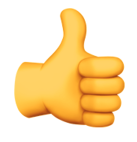

<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** and our machines will get crowded and slow _before every deadline_.  This is completely predictable.  The cluster can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this assignment/lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the assignment/lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the assignment/lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to piazza.

## Posting Answerable Questions on Piazza

If you want useful answers on edstem/piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which assignment/lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an edstem/piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on edstem/piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your assignment/lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
lab is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


```
cd <your directory for this assignment/lab>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment/lab. It will fail 
                                              # harmlessly if you run it more than once.
cp assignment-lab.ipynb assignment-lab.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

In [ ]:
# Be sure to click save to preseve your progress before updating
! ./fix-repo
! ./pull-updates

Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this assignment/lab.  You should be able to do much of this assignment/lab without leaving Jupyter Notebook.  The main exception will be some of the programming chanllenges.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

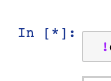


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

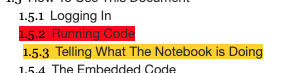

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

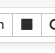

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

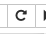

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Grading

## CSE142
If you are taking CSE142, you will need to submit the CSE142&CSE142L and CSE142 Only questions before each CSE142 assignment deadline. These questions will be graded based on correctness.

## CSE142L
Your grade for this lab report will be based on your completion and submission of CSE142&CSE142L and CSE142L Only questions on this notebook.


Check Gradescope for the due dates.

## Submissions

Instructions for submitting the assignment/lab are at the end of the assignment/lab.

No late work or extensions will be allowed.

# Understanding another aspect of the processor

In this assignment, we will use the Intel Xeon Gold 6140 "Sky Lake" processor that you've been used before. Now, as you have more knowledge about computer architectures, let's take a look of the processor detail again and see if you have different feelings.

In [ ]:
! cse142 run 'lscpu'

As we learned in the lectures, the cache configuration determines the performance of executing code. Knowing the cache configurations and the parameters -- $A, B, C, S$ would help us to better predict how memory accesses will behave when executing code. The following command will help us getting these important cache configurations and parameters on the bare metal cloud machine. 

In [ ]:
!cse142 run ' getconf -a | grep CACHE'

<div class="alert alert-block alert-info">

### Question 1 (CSE142 Only)

<div class="question-text">

Reading the output from the above command, let's focus on "LEVEL1_D", namely, the L1 data cache configuration first. Remember the $C=ABS$ equation we taught in class, can you try to answer the following questions? 
</div>
    
<div class="answer">

| Cache Parameter  | Value |
| ---------------- | -----|
|               C  |       |
|               A  |       |
|               B  |       |
|               S  |       |
| # of offset bits |       |
| # of index bits  |       |
    

</div>
</div>

<div class="alert alert-block alert-info">
<div class="answer">
You answers:


| Cache Parameter  | Value |
| ---------------- | ----- |
|               C  |       |
|               A  |       |
|               B  |       |
|               S  |       |
| # of offset bits |       |
| # of index bits  |       |

    
$ Show\ your\ work\ here $

</div>
</div>

# When will a program access "data memory"

In the von Neumann architecture, a program can access memory when (1) fetching instructions, technically, every instruction, and (2) accessing (read/write) data upon a request from an instruction. To predict and optimize the effect of memory access in our code, understanding and predicting the pattern of memory accesses is important. Since instruction memory access occurs every instruction and typically has strong localities, we focus more on the data memory access part, that is less regular, in this assignment. 

Let's take a look of the following `array` function.


In [ ]:
array = build(code(r"""

#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

"""),build_parameters=arg_map(OPTIMIZE=["-mno-avx -O0","-mno-avx -O1"]))

compare([array[0].asm("array"), array[1].asm("array")],
        ["-mno-avx -O0","-mno-avx -O1"])

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 2 (CSE142&CSE142L)

<div class="question-text">

Investigating the two versions, unoptimized (i.e., -O0) and optimized (i.e., -O1)of the compiled code, please identify where the code stores the variables `x` and `size`, and which instruction accesses `data[x]`. 
</div>

</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">

Answer: 

| Question                                 | Unoptimized        | Optimized |
| ---------------------------------------- | ------------------ | --------- |
| 1. Where does the code store `x`?        |                    |                   |
| 2. Where does the code store `size`?     |                    |                   |
| 3. Where does the code access `data[x]`? |                    |                   |


Please explain:

</div>
</div>

## Register assignment

As memory accesses are slow (still true now!) compared to the processor speed, an essential compiler optimization is _register assignment_.  Register assignment takes local variables and intermediate values and stores them in register rather than on the static.  This saves `mov` instructions and memory accesses.  Looking at the above two versions of compiled `array` function, where the code on the left is unoptimized and the code on the right is optimized. You should notice a few things.

1. First, the "base pointer" is in `%rbp`.  This is the base of the stack frame for this function call.  Local variables typically live on the stack and are accessed relative to the base pointer.

2. In x86, the first two function arguments are passed in `%rdi`, `%rsi` and `%rdx`.  Return values are stored in `%rax`.

3. In unoptimized code, `sum` and `x` are on the stack at locations `-8(%rbp)` and `-12(%rbp)`, respectively.  In fact, the compiler goes through the trouble of storing `%edi` and `%esi` into `(%rbp)` and `-8(%rbp)`.  

4. _immediately_ uses `movl` to load `x` back into the `%eax/%rax` before the `cmpq` instruction loads `size` from the stack, and compare the value in `%rax` with the loaded value, and storing the result in a flag. 

In constrast, the optimized code avoids all that nonsense memory accesses with the stack.  It just initialize the value of `x` in `%rdx` using the `movl` instruction near `LBB3:`, making the argument in `%rsi` (where we pass `size` from) remain unchanged throughout the function, and compare it with `%rdx`.

<div class="alert alert-block alert-danger">

**Pro Tip: Identifying unoptimized assembly** Register assignment is one of the most basic optimizations that compilers preform and the difference between the optimized and unoptimized versions is starkly obvious.  This means that you can usually just tell by looking at assembly code whether it was compiled with optimizations enabled: if it has lots of parentheses (on instructions other than `lea`) it's probably not optimized.
    
</div>

You can also encourage the compiler to put a variable into a register with the `register` keyword.  This is not a good practice in real code since modern compilers do register assignment automatically.  We'll use this trick in some of our examples to highlight the impact of individual optimizations.  

<div class="alert alert-block alert-danger">

**Take-away:** Since register assignment is one of the most basic optimizations that compilers preform, you should assume people will compile code with this optimization turned on. Starting now, in this assignment as well as the rest quarter of cse142, you should also assume register assignment is always turned on. The general guideline here is, typically, as long as the function does not use too many local variables and loop indexes (an x86 processor has 16 registers now, so let's say fewer than 8 of those), you should assume local variables, loop indexes, and base addresses of pointers/data structures should just occupy registers instead of stack memory locations.
</div>

# Predicting and measuring the memory access performance

As you learned in cse142, the DRAM-based main memory is way slower than the processor speed. Therefore, it's important for the programmers to know how their code can benefit from caches. In this section, we will practice the prediction techniques you learned from cse142 and match it with real measurements.

## Predicting cache miss rates

Let's go back to the `array` function back again and assume register assignment is turned on.

<div class="alert alert-block alert-info">

### Question 3 (CSE142 Only)

<div class="question-text">

Given the cache configuration we've learned in Question 1. If `size == 8192`, how many total L1 data cache misses do think will occur during the execution of `array()`? Assume the cache is empty to begin and you may assume the `data` address starts with something like 0x40000 as we did in the lecture. 

</div>

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |

**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

</div>
</div>

<div class="alert alert-block alert-info">
    
<div class="answer">
    
Answer:
    
**How many data memory accesses in total?**

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |


**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

$Show\ your\ work\ here$

</div>
</div>

## Measuring Cache Performance with Performance Counters

We'll use performance counters to measure cache performance on our bare metal machines in the cloud.  We'll use the same tools we've used so far to measure `IC`, `CPI`, and `CT`.

Let's measure the cache behavior of `array` from the example above. Please run the following cell:

In [ ]:
t = fiddle("array.cpp", function="array", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, array);
""")

!rm -f build/array.so; make MICROBENCH_OPTIMIZE="-mno-avx -O1" ./build/array.so fiddle.exe
!cse142 run "./fiddle.exe -l ./build/array.so -f array -s 8192 -M 3700 -o array.csv"

Now, let's show the result in a table. 

In [ ]:
display_mono(render_csv("array.csv", columns=["function","size", "IC", "CPI", "CT","ET", "L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses"]))

<div class="alert alert-block alert-danger">
    
The `L1_cache_misses` column has the number of L1 cache misses.  `L1_dcache_miss_rate` is the ratio of cache misses per memory access.

As you can see our estimate is very good for large array sizes.   For smaller sizes, the actual number is higher due to extra instruction executed before and after `array`.
</div>

## Measuring Cache Latency and Bandwidth

Caches reduce latency and increase bandwidth.  Let's  refresh our memory about the machine we are running on and see how large this effect is.

### The Caches we Have

Run the cell below remind yourself how large our L1, L2, and L3 caches are.

In [ ]:
!cse142 run 'getconf -a | grep CACHE'

### Cache Latency

We will use a different tool to measure cache latency.  This one is called `lat_read_rd` and it's part of set of system benchmarks called [`lmbench`](http://lmbench.sourceforge.net/).  `lat_mem_rd` measures the latency for repetitive accesses large and larger arrays.  For arrays that fit in the L1 cache, the average latency of these accesses is the L1 cache latency.  For arrays bigger than the L1 but that fit in the L2, it's the L2 cache latency.  Likewise, for L3.


    
Helpully, the man page will tell you:

In [ ]:
!cse142 run "man lat_mem_rd"

Sound familiar?
    

Recall from the previous section that our processor has a 48 KB L1, a 1.5MB L2, and a 12MB L3.  Usually, I'd have you run `lat_mem_rd` but it takes a long time to run and the output format is annoying, so here are the results:

In [ ]:
df = render_csv("lat_mem_rd.csv")
df["size_bytes"] = df["size_MB"]*1024*1024
plotPE(df=df, what=[("size_bytes", "latency_ns")], lines=True, logx=2, logy=2, log_autoscale_x=False, log_autoscale_y=False)
display_mono(df)

The "stair step" pattern you see is the jump in latency as data accesses start being served out of the slower and slower, layers of the memory hierarchy.   The steps occur roughly we expect them to:  32KB (L1 to L2), 1024KB (L2 to L3), and 24.75MB (L3 to DRAM).  For larger sizes things get noisier so the "steps" aren't as crisp.

<div class="alert alert-block alert-success"><div class="question correctness points-4">

### Question 4 (CSE142&CSE142L)

<div class="question-text">

Based on this graph, give the latencies for each level of the caches. You should assume the CPU frequency is 3.7 GHz

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

| Level of the memory hierarchy | latency (ns) |  latency (Cycles) |  
| ------------------------------|---------|-| 
| L1  | |   |
| L2 | |  |
| L3 | |  |
| Main memory | | |
    
</div>
    
</div>

## Cache Bandwidth

We don't have a handy tool for measuring cache bandwidth.  Maybe we'll build one as a future programming lab...

We do however, have some technical details about about processor, so we can calculate what the peak (maximum attainable) cache bandwidth should be.

Intel's Sky Lake processors (of which our CPU is an example) [More Info] (https://www.intel.com/content/www/us/en/products/sku/120485/intel-xeon-gold-6140-processor-24-75m-cache-2-30-ghz/specifications.html) can execute up to 2 64-byte loads and up to 4 64-byte store per cycle.  At 3.7 GHz, this works out to $$2 \times 64 \times 3.7 \times 10^9 = 473.6 GB/s$$ for loads and $$4 \times 64 \times 3.7 \times 10^9 = 947.2 GB/s$$ for stores.

The L2 cache provide one 64-bytes load _or_ store per cycle for $$64 \times 3.7\times 4e9= 236.8 GB/s$$.

I don't have any information about the L3. 

## Are the Caches Fast?

They are certainly better than DRAM -- the L1's latency is $\frac{17.148000}{1.110000} = 15.45$ times lower than DRAM, and bandwidth (in our system with two channels of DRAM) is $\frac{}{25.6} = 18.5$ times higher.  Not only that, remember that we have 36 cores, so the total L1 cache read bandwidth is $473.6GB/s \times 36 ~ 17049.6 GB/s ~ 17 TB/s$.

However, the minimum load latency -- $\lceil \frac{1.1}{\frac{1}{3.7\times 10^9}} \rceil = 5$ cycles -- is still pretty high, considering that it's 5 times longer than the latency for a simple integer arithmetic operation (add, sub, etc.).  That means that having lots of load instructions can have a significant impact on CPI.

Caches are also slow compared to the register file. The register file latency is a little hard to quantify in a way that is comparable to cache latency, but 1/2 a cycle is a reasonable approximation. The register file is also quite large:  The total size is about 1kB.   It's reasonable to think of the register file a software-managed, "L0" cache.

# Locality In Space and Time

Caches improve program performance by exploiting the fact that memory accesses are not random: Programs access memory in patterns and there is a lot of repetition in what programs do and a lot of similarity how programs behave at different times.  This is not surprising since, programs are written languages with constructs like loops and function calls:  These constructs naturally give rise to patterns because they cause the same code to execute repeatedly.


## Spatial Locality

As you should recall from lecture, _spatial locality_ is a property of a program (or part of a program) where it accesses memory locations nearby locations it has accessed recently.  Let's see how spatial locality can affect performance.

Here's a simple test program that accesses a 1-dimensional tensor at different "strides".  The "stride" of a sequence of accesses is just the distance between consecutive accesses.  So, "stride 1" means accessing each element, and "stride 2" means accessing every other element.  The outer loop ensures ensures that the total number of accesses the loop perform remains the same, regardless of stride size).

Examine the code below, and then answer these question:

In [ ]:
t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""
#include"function_map.hpp"
#include<cstdint>


extern "C"
uint64_t* stride(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum+=data[x];
        }
    }
    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, stride);
""")

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 5 (CSE142&CSE142L)

<div class="question-text">
How many L1 D-cache misses would you expect for `stride == 1`?  How about `stride == 8` and `stride == 16`?  Assume `size` is very large and that cache lines are 64 bytes. 
</div>
<div class="answer">

**`stride == 1` L1 D-Misses:** 

**`stride == 8` L1 D-Misses:**
    
**`stride == 16` L1 D-Misses:** 

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
    
Answer:

**`stride == 1` L1 D-Misses:** 

**`stride == 8` L1 D-Misses:**
    
**`stride == 16` L1 D-Misses:** 

</div>
</div>



Now, let's verify the result through running the program (by setting `-a` as `1 8`! Let's see if those predictions match reality.  Run the cell below.  It'll run the code above.



In [ ]:
!rm -f build/stride.so; make build/stride.so C_OPTS='-mno-avx -O1' fiddle.exe
!cse142 run './fiddle.exe -l build/stride.so -f stride -M 3700 -size 134217728 -a 1 8 16 -i 10 -o spatial.csv'

Let's draw the results into tables and graphs and see what those look like

In [ ]:
df = render_csv("spatial.csv", average_by="arg1", columns=["size", "IC", "Cycles", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"])
display_mono(df)
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_dcache_miss_rate')])

<div class="alert alert-block alert-warning">

### Question 6 (CSE142L Only)


Do the measurements match our predictions?  Does anything seem surprising about the results?

</div>

<div class="alert alert-block alert-warning">
<div class="answer">
Answer: 
</div>
</div>

Of course, it's not really the misses we are worried about -- it's the impact on performance.

Recall what happens on a cache miss:  Instead of having accessing the data in the cache, the processor must go down the memory hierarchy.  In the worst case, this means going to main memory, which can easily take 100s of cycles.  Let's imagine it's 200 cycles.  What will the impact be on CPI?



For the next time account for the 5-cycle latency for hits in the problem.  If you do, this prediction is much closer to the result.

Use a value for miss latency is more closely matches the actual value.

<div class="alert alert-block alert-info">

### Question 7 (CSE142 Only)

    
Based on the data that we observed, please estimate the ET when `size` becomes 268435456 and `arg1` is 16. 
    

</div>
</div>

<div class="alert alert-block alert-info">

<div class="answer">

**Your estimation**

**Show your work**
    
</div>
</div>

Here's how it actually played out:

In [ ]:
!cse142 run './fiddle.exe -l build/stride.so -f stride -M 3700 -size 268435456 -a 16 -i 10 -o spatial.csv'
df = render_csv("spatial.csv", average_by="arg1", columns=["size", "IC", "Cycles", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"])
display_mono(df)
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_dcache_miss_rate')])

There's no particular reason to expect these number to match your calculation in the question above.  We don't know exactly how long an L1 cache miss takes.  100 cycles is a guess, but in both cases the large impact of cache performance on execution time should be clear.


## Temporal Locality

Temporal locality exists when a program accesses the same memory multiple times within a short time.  Caches exploit temporal locality by holding on to data that has been accessed recently.  If the processor accesses it again, the cache can provide it very quickly.

With spatial locality, it was pretty easy to predict the cache miss rate for a simple loop that performs stride-based accesses (see below).  With temporal locality it is harder because of associativity and conflicts.  Before we dive into that, let's have quick refresher about how caches work (if this is fuzzy, go back and the review the slides and/or readings).

When a memory operation (load or store) accesses a memory location, $A$, the cache breaks $A$'s address into three parts: 

| tag | index | offset | 
|-----|-------|--------|
| the remaining bits | `log2(# of associative sets)` | `log2(block size)`|

Together, the tag and the index of $A$ are a unique name (or number) for the cacheline-sized (and cacheline size-aligned) piece of memory that contains $A$.  The index of $A$ tells that cache which associative set might contain that cache line.

The cache can then check that set to see if $A$ is present.  If it is, it's a hit.  If not, it's a miss, and the cache will choose one of the lines in the set to evict to make room for $A$'s cache line.

There are two important things to note:

1.  $A$'s cacheline is in the cache if and only if, it is in the associative set corresponding to its index (it can never be in another associative set).
2.  There are many, many other cache lines that also "live" in $A$'s associative set.

The L1 data cache in our processor is 32KB, with 64-byte blocks/lines, and it's 8-way set associative. So, there are $\frac{32 \times 1024}{64}= 512$ cache blocks arranged in $\frac{512}{8} = 64$ associative sets.  If the machine has 256 GB of memory, it has 4.2 Million cache lines of main memory.  So, there are about 0.5 million cache lines that "live" in each associative set.  Clearly, there is plenty of opportunities for conflicts.

To see how temporal locality plays out in practice, here's the same code we looked at in the last question:

In [ ]:
t = fiddle("stride_2.cpp", function="stride", name="spatial", opt="-O1",
code=r"""

#include"function_map.hpp"
#include<cstdint>



extern "C"
uint64_t* stride_2(uint64_t * data, uint64_t size, uint64_t arg1) {
    
    uint64_t sum = 0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
    }
    data[0] =sum;
    return data;
}

FUNCTION(one_array_1arg, stride_2);
""")

We are going to run it again with a fixed stride of 8 elements (64 bytes -- our cache line size) and we will vary `size` between 1024 and 16384 (16 * 1024).  This corresponds to region of memory between 8kB and 128kB.  Setting the stride to the cache line size ensures that our access stream has very little _spatial_ locality, since every access will refer to a different cache line.

<div class="alert alert-block alert-success">

### Question 8 (CSE142&CSE142L)
    
Given the conditions described above, estimate the _number of cache misses_ that will occur for `size = 1024`, `size = 4096`, and `size = 16384`.  Assume we run `stride()` 10,000 times with the same values of `data` and `size`. The stride size is 8.


</div>

<div class="alert alert-block alert-success">    
<div class="answer">

Answer:    

**Cache misses for size = 1024:**

**Cache misses for size = 4096:**

**Cache misses for size = 16384:**

**Show your work here**
</div>
</div>

Run the cells below to see how your prediction played out.

In [ ]:
!make build/stride_2.so C_OPTS='-mno-avx -O1' fiddle.exe
!cse142 run './fiddle.exe -l build/stride_2.so -M 3700 -f stride_2 -s 1024 2048 4096 6144 8192 16384 -a 8 -i 10000 -o temporal.csv'
df = render_csv("temporal.csv", average_by = "size",columns=["arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"])
display_mono(df)
plotPE(df=df, lines=True, what=[ ('size', 'CPI'), ('size', 'L1_dcache_miss_rate')])

<details>

<summary>Prediction v.s. reality</summary>

 For small sizes, agreement is not great.  We predicted 128 misses at `size=1024`, but we have a few thousands. This is fine, there's other stuff going on and the `L1_dcache_miss_rate` is still very, very low.
    
Our prediction at `size = 16384` is pretty close. 
    
The `size=4096` is interesting. It should exactly fit (4096/8 = 512 blocks), but we have a lot more misses.  This is because there's other stuff in memory (e.g., the stack) and the data should just barely fit.   However, while get significantly more misses than at `size=1024`, the `CPI` is still quite low.
    
</details>

# The Three C's

Recall from lecture (or review the slides) that we can classify cache misses into types (known as "The Thee C's"):

1.  **Compulsory**: These misses occur because the processor has not accessed this cache line before.

2.  **Capacity**: These occur because the program is accessing more memory than the cache can hold (i.e., it's working set is bigger than the cache).

3.  **Conflict**: These occur because a given cache line of memory can only live in one of the associative sets of the cache.

## Capacity and Compulsory Misses

The our investigation of spatial locality, temporal locality, and working sets illustrated compulsory and capacity misses.

<div class="alert alert-block alert-danger">

**Compulsory** The misses that occur in the first time through the inner loop of `stride()` are all compulsory misses.
</div>

<div class="alert alert-block alert-danger">

**Capacity** In the same experiment, we saw that when the number of cachelines accessed exceeds the number of cache lines in the cache, we get many misses.  These are all capacity misses:
   
</div>

<div class="alert alert-block alert-success">

### Question 9 (CSE142&CSE142L)
    
What's the major types of misses in Question 8 when `size == 1024` and `size == 16384`. 


</div>

<div class="alert alert-block alert-success">
<div class="answer">
Answer:

**What's the major type of 'stride()' in Question 8 when `size == 1024`?**

**What's the major type of 'stride()' in Question 8 when `size == 16384`?**

</div>
</div>

## Conflict Misses

Let's try to produce some conflict misses. For conflict misses, we need something different:  Highly-organized misses placed precisely.

The necessary ingredients for lots of conflicts misses are many memory accesses that will map to the same associative set in the cache.  If we access many of these cache lines, the associative set will "overflow" and that will causes misses.

<div class="alert alert-block alert-info">

### Question 10 (CSE142 Only)
    
Assume our 48KB cache with 64-byte lines and 12-way associativity and 64-bit addresses.  Given an address $A$, how can we compute a new address, $B$, that will map to the same associative set but is not part of the same cache line as $A$?  Given an index, $i$, into a `uint64_t` array, how can we compute the index of another element, $j$, that will conflict with the first? 

</div>

<div class="alert alert-block alert-info">
<div class="answer">

**How do you compute `B`?**

**How do you compute `j`?**

</div>
</div>

Let's see if your formula worked.  We'll run `stride()` from early with a stride of 8 and 512.  In the experiment below we set the size `-s` so that we cover 64 strides worth of the memory, since both strides are larger than cache line, each execution of the loop will touch 64 cache lines.

In [ ]:
from notebook import *

t = fiddle("conflict.cpp", code="""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* conflict(uint64_t * data, uint64_t size, uint64_t arg1) {

        uint64_t sum=0;
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
        data[0] = sum;
        return data;
}

FUNCTION(one_array_1arg, conflict);
""")

!rm -f build/conflict.so; make C_OPTS="-mno-avx -O1" build/conflict.so
!cse142 run './fiddle.exe -l build/conflict.so -M 3700 -f conflict -size 1024 -a 8 -i 10000 -o stride8.csv'
!cse142 run './fiddle.exe -l build/conflict.so -M 3700 -f conflict -size 65536 -a 512 -i 10000 -o stride512.csv'

In [ ]:
df = render_csv(["stride8.csv", "stride512.csv"])
display_mono(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"),("arg1", "L1_dcache_misses"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="alert alert-block alert-warning">

### Question 11 (CSE142L Only)
    
Based on our analysis above, what do you think will happen with if the stride is one cache line longer (504) or or one cache line shorter (520)?  Why?

</div>

<div class="alert alert-block alert-warning">    
<div class="answer">

**Stride 504:**
    
**Stride 520:**
    
</div> 
</div>

<details>

<summary>Why 512, 504, and 520?</summary>

In the analysis analysis above, we chose 512 because it was $2^{12}/\mathrm{sizeof(uint64\_t)}$, and we choose $2^{12}$ because that stride size would change the tag bits without changing the index bits.  And this, in turn, would cause all the cache lines to fall in a singe associative set.  A look at the binary representation of $2^{12}$ shows with this is true: `1 0000 0000 0000b`. (the `b` means binary).  Since there are no 1's in low order bits, adding $2^{12}$ won't change the index or offset.
    
For stride 520 in an array of `uint64_t`, the number of bytes in stride is 4160:  Let's look at 4160 in binary: `1 0000 0100 0000b`.  It has 1 down there, so adding it _will_ change the index.  So, the cache lines _will not_ fall into a single associative set.  Hence, cache misses should be lower.
</details>

Let's see what happens:


In [ ]:
!cse142 run './fiddle.exe -l build/conflict.so -f conflict -size 64512 -a 504 -i 10000 -o stride504.csv'
!cse142 run './fiddle.exe -l build/conflict.so -f conflict -size 66560 -a 520 -i 10000 -o stride520.csv'
df = render_csv(["stride8.csv", "stride504.csv", "stride512.csv", "stride520.csv"])
display_mono(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"), ("arg1", "CPI"), ("arg1", "ET")])


<div class="alert alert-block alert-danger">
    
The number of misses per instruction is almost identical to the stride-8 case!
    
</div>


The main lesson here is that conflict misses are largely product of bad luck:  It may happen that for a particular cache capacity, associativity, and line size, that many cache lines in the application's working set happen to map to the same associative set.

Fortunately, in modern processors caches are pretty highly-associative (our is 8-way) and at that level of associativity conflict misses are not a huge problem.  If you working set is smaller than your cache's capacity, you'd have to be very unlucky to have enough cache lines land in the same associative set to cause many conflict misses.  As the example above shows, however, it is not hard to construct programs that are this unlucky.  We have a term for these access patterns:  We say they are "pathological".

By definition, pathological access patterns are rare, so we don't spend too much time worrying about them.  But they can crop up and it's a good idea to be aware of the possibility.

# Turning In the Assignment

For each assignment, there are two different assignments on gradescope:

1.  The CSE142 assignment.
2.  The CSE142L Lab Report

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:** After you complete the assignment, you will need to turn it in by creating a version of the notebook that only contains your answers. Run this command:

In [ ]:
!cse142 turnin assignment-lab.ipynb
!ls -lh assignment-lab.turnin.ipynb

The date in the above file listing should show that you just created `assignment-lab.turnin.ipynb`

**Step 3:**  Click on this link to open it to see that looks good: [./assignment-lab.turnin.ipynb](./assignment-lab.turnin.ipynb)
You may need to revise your notebook and repeat Step 1 to 3 if something went wrong.

**Step 4**: Commit everything. Please run the following command.

In [ ]:
!git add -f assignment-lab.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

**Step 5**: 
Submit through both entries in gradescope
You'll turn in your assignment and report by providing gradescope with your github repo of this assignment.   It'll run the autograder and return the results.